# Neural Networks from scratch

# Brief Description

Trying to implement Neural Networks from scratch

1. Dataset : Iris Dataset
2. Neural Network Architecture

-Input Layer : 4 nodes

-Hidden Layer : 2 nodes (Sigmoid activation Function)

-Output Layer : 3 nodes

3. Activation Fucntion : Sigmoid Activation Function

4. Optimization Technique : Stochastic Gradient Descent

5. Cost Function : Mean-Squared Error


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import datasets

In [90]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris = sklearn_to_df(datasets.load_iris())

In [92]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [94]:
df_iris2 = df_iris

In [96]:
df_iris2['target'] = df_iris2['target'].replace({0:'Setosa',1:'Versicolor',2:'Virginica'})
df_iris2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [98]:
df_iris2 = pd.get_dummies(df_iris2, 'target')

In [100]:
df_iris2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_Setosa,target_Versicolor,target_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [102]:
X = df_iris2.drop(columns = ['target_Setosa', 'target_Versicolor','target_Virginica'], axis = 1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
y = df_iris2[['target_Setosa', 'target_Versicolor',
       'target_Virginica']]

# Activation Function

In [104]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Helper Functions

In [105]:
def mean_squared_error(predictions, labels):
    N = labels.size
    mse = ((output_layer_outputs - np.array(labels))**2).sum()/(2*N)
    return mse

In [106]:
def accuracy(predictions, labels):
    predicions_correct = predictions.argmax(axis=1) == np.array(labels).argmax(axis=1)
    accuracy = predicions_correct.mean()
    
    return accuracy

# Parameters

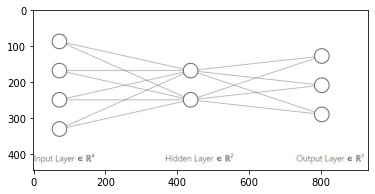

In [131]:
# Read Images 
img = mpimg.imread('C:\\Users\\asus\\OneDrive\\Pictures\\Capture.jpg')

# Output Images 
plt.imshow(img) 



In [107]:
learning_rate = 0.1
N = y.size
epochs = 10000

n_input = 4
n_hidden = 2
n_output = 3

# Random Weights Initialized

In [108]:
np.random.seed(10)

weights_1 = np.random.normal(scale = 0.5, size = (n_input, n_hidden))
weights_2 = np.random.normal(scale = 0.5, size = (n_hidden, n_output))

monitoring = {"mean_squared_error" : [], "accuracy":[]}

# FeedForward Propagation

In [109]:
#Feedforward
hidden_layer_inputs = np.dot(X, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

### Mean Squared Error

In [110]:
y_np = np.array(y)

mse = ((output_layer_outputs - y_np)**2).sum()/(2*N)
print(mse)

0.13761957836254335


### Accuracy

In [111]:
# predicions_correct = output_layer_outputs.argmax(axis=1) == y_np.argmax(axis=1)
# accuracy = predicions_correct.mean()

print(accuracy(output_layer_outputs, y))

0.3333333333333333


# Backward Propagation

In [112]:
# #BackwardPropagation
output_layer_error = output_layer_outputs - y_np
output_layer_delta = output_layer_error * output_layer_outputs * (1-output_layer_outputs)

hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

#weights update
weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta)/N
weights_1_update = np.dot(X.T, hidden_layer_delta)/N

weights_2 = weights_2 - learning_rate*weights_2_update
weights_1 = weights_1 - learning_rate*weights_1_update

In [113]:
#Feedforward
hidden_layer_inputs = np.dot(X, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

### Mean Squared Error : With updated weights

In [114]:
mse = ((output_layer_outputs - y_np)**2).sum()/(2*N)
print(mse)

0.13730616116287855


### Accuracy : With updated weights

In [115]:
# predicions_correct = output_layer_outputs.argmax(axis=1) == y_np.argmax(axis=1)
# accuracy = predicions_correct.mean()
# print(accuracy)

print(accuracy(output_layer_outputs, y))

0.3333333333333333


## There has been a marginal decrease in the mean-squared-error, but no change in accuracy of the model

## Now we plan to update the weights over a number of epochs

In [117]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [118]:
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / y_train.size
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / y_train.size

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df = pd.DataFrame(monitoring)

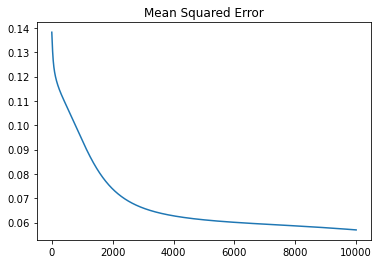

In [119]:

monitoring_df.mean_squared_error.plot(title="Mean Squared Error")

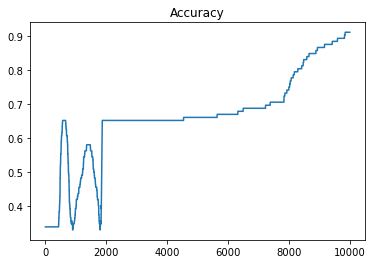

In [120]:
monitoring_df.accuracy.plot(title="Accuracy");

In [127]:
#Check the trained model on test data

#Feedforward
hidden_layer_inputs = np.dot(x_test, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [128]:
mse = ((output_layer_outputs - np.array(y_test))**2).sum()/(2*N)
print(mse)

0.0118318205550259


In [129]:
print(accuracy(output_layer_outputs, y_test))

0.9736842105263158
